In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('Concrete_Data.xls')
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_14044\3564058394.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


<Axes: >

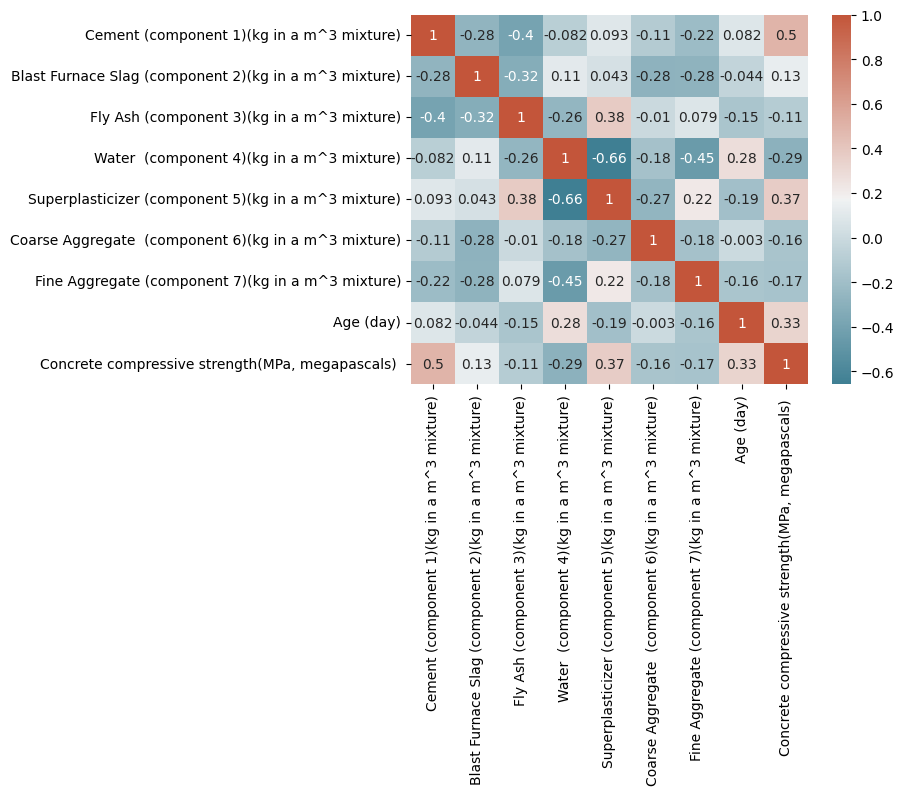

In [11]:
# Correlation matrix with heatmap and number
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [28]:
# choose features with correlation > 0.2 and < -0.2
corr_features = corr[(corr['Concrete compressive strength(MPa, megapascals) '] > 0.15) | (corr['Concrete compressive strength(MPa, megapascals) '] < -0.15)]
corr_features.index

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [30]:
X = df[['Cement (component 1)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']]
y = df['Concrete compressive strength(MPa, megapascals) ']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=500, random_state=0)

In [32]:
k = 3
num_val_samples = len(X) // k
all_scores = []
for i in range(k):
    print(f"Processing fold #{i+1}")
    val_data = X_train[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples:(i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],axis=0)
    model.fit(partial_train_data,partial_train_targets)
    all_scores.append(model.score(val_data, val_targets))

foldIndex = [1, 2, 3]
scores = pd.DataFrame(all_scores, index=foldIndex)

Processing fold #1


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Processing fold #2


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Processing fold #3


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [33]:
scores

,0
1,0.844984
2,0.857191
3,0.867154


In [34]:
model.fit(X_train, y_train)
r2 = r2_score(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
model.score(X_test, y_test)

0.9083026783931905